# INTRODUCTION
# 简介
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.
# 我们有一个数据，可以根据病人是否患有心脏病来分类。我们将尝试使用这些数据来创建一个模型来预测病人是否患有这种疾病。我们将使用逻辑回归(分类)算法。

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# 这个python3环境安装了许多有用的分析库
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# 它是由kaggle/python docker映像定义的:https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# 例如，这里有几个需要加载的有用包

import numpy as np
import pandas as pd            # for data manipulation and analysis  用于数据操作和分析
import matplotlib.pyplot as plt
import seaborn as sns          # a Python data visualization library based on matplotlib 一个基于matplotlib的Python数据可视化库
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# 输入数据文件在…/输入/”目录。
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# 例如，运行它(通过单击run或按Shift+Enter)将列出输入目录中的文件

import os


# Any results you write to the current directory are saved as output.
# 写入当前目录的任何结果都将作为输出保存。

## Read Data

In [7]:
# We are reading our data
df = pd.read_csv("C:/Users/H/Desktop/AI/nurual network/实验二/1、数据/heart.csv")

In [8]:
# First 5 rows of our data           #输出前五行数据
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains; <br>

* age - age in years <br>                    #年龄——以年为单位的年龄
* sex - (1 = male; 0 = female) <br>          #性别-(1 =男性;0 =女性)
* cp - chest pain type <br>                  #胸痛型
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>   #trestbps -静息血压(入院时用毫米汞柱表示)
* chol - serum cholestoral in mg/dl <br>     #血清胆汁淤积
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>   #fbs -(空腹血糖> 120 mg/dl)(1 =真;0 = 假)
* restecg - resting electrocardiographic results <br>         #静息心电图结果
* thalach - maximum heart rate achieved <br>                  #达到最大心率
* exang - exercise induced angina (1 = yes; 0 = no) <br>      #运动性心绞痛
* oldpeak - ST depression induced by exercise relative to rest <br>     #运动相对于休息引起的oldpeak - ST抑郁
* slope - the slope of the peak exercise ST segment <br>                #斜率-运动ST段的峰值斜率
* ca - number of major vessels (0-3) colored by flourosopy <br>         #ca -主要血管的数目(0-3)
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>       #thal - 3 =正常;6 =固定缺陷;7 =可逆转的缺陷
* target - have disease or not (1=yes, 0=no)                  #目标-是否患病(1=是，0=否)                  

## Data Exploration
#  数据挖掘

In [12]:
df.target.value_counts()     # 输出 target列 1和0的个数


1    165
0    138
Name: target, dtype: int64

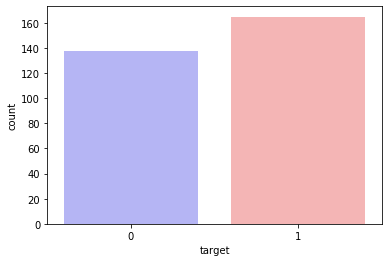

In [10]:
sns.countplot(x="target", data=df,palette="bwr")     #palette颜色  #Show the counts of observations in each categorical bin using bars.
plt.show()        # x=""代表横坐标                                  #使用条形图显示每个分类箱中的观察计数。


In [13]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


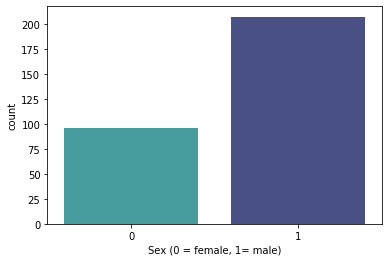

In [13]:
sns.countplot(x='sex', data=df, palette="mako_r")   ##统计data中‘sex’这个特征每种类别的数量
plt.xlabel("Sex (0 = female, 1= male)")       # femael表示女性 ，male表示男性
plt.show()


In [14]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))



Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [15]:
df.groupby('target').mean()            #分组看均值



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


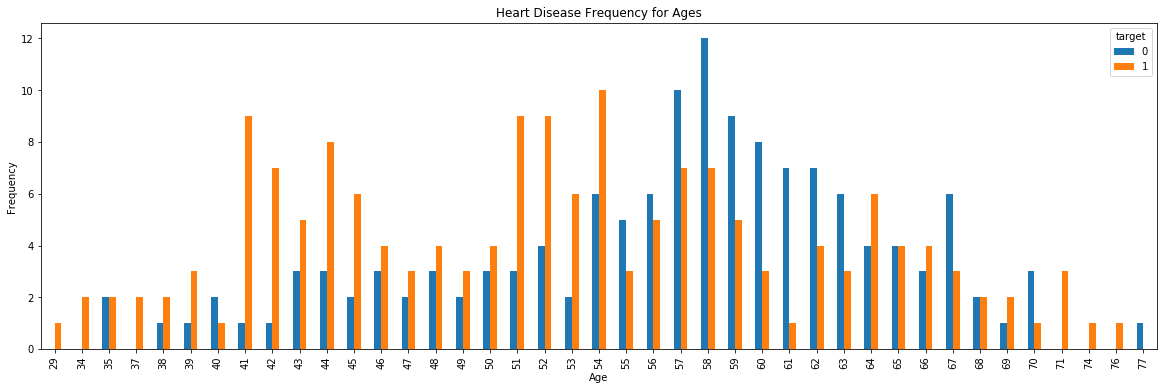

In [23]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))   #A crosstab is a table showing the relationship between two or more variables
plt.title('Heart Disease Frequency for Ages')                   #交叉表是显示两个或多个变量之间关系的表
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()



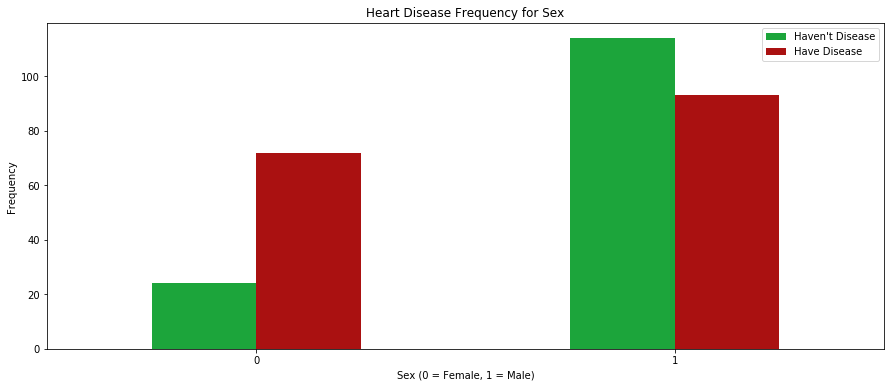

In [28]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])    
plt.ylabel('Frequency')
plt.show()



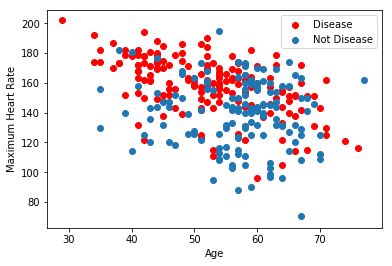

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()



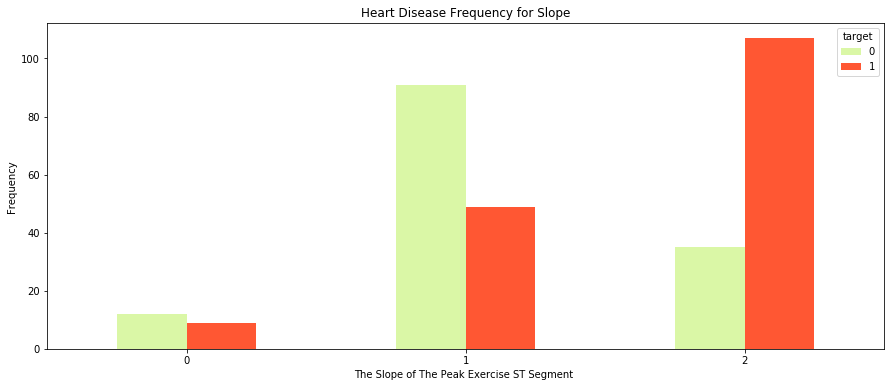

In [13]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])   # slope
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()



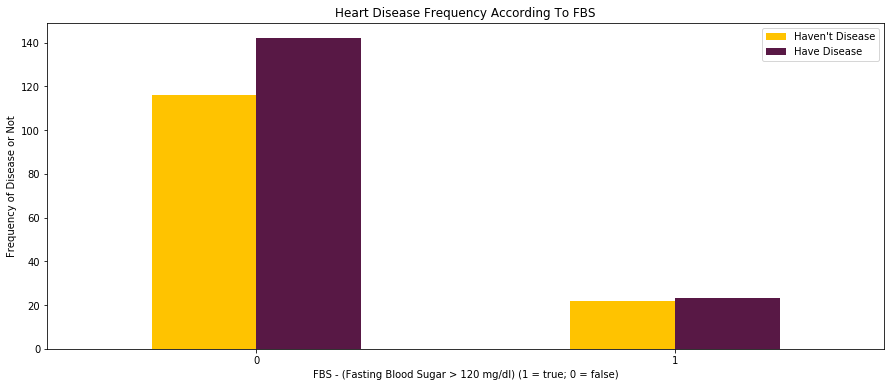

In [30]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])   # fbs
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()



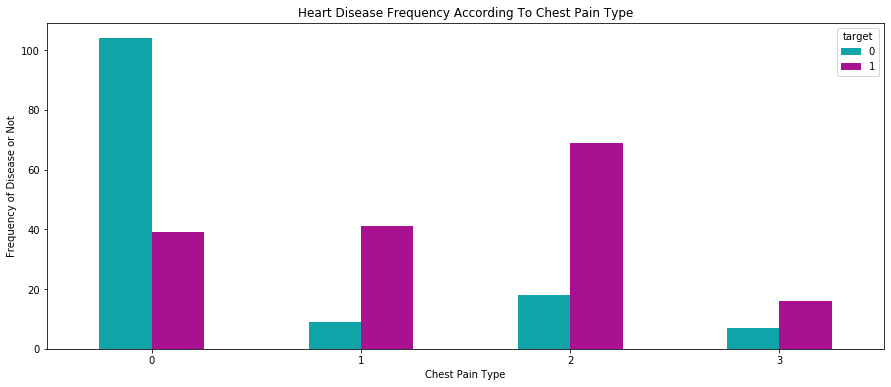

In [33]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])    # cp
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()



### Creating Dummy Variables
#   创建虚拟变量

![](http://)Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
#            由于cp、thal和slope是分类变量，我们将它们转换为哑变量。



In [34]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")



In [35]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [36]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()



,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Creating Model for Logistic Regression
#  建立逻辑回归模型
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.
# 我们可以使用sklearn库，也可以自己编写函数。他们两个。首先我们将写我们的函数，然后我们将使用sklearn库来计算分数。

In [37]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data
#   标准化数据
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [20]:
# Normalize
# 标准化
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.
# 我们将分割数据。我们80%的数据是训练数据，20%是测试数据。

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Sklearn Logistic Regression
#   Sklearn逻辑回归

In [22]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy 86.89%


1. ## <font color = "purple">Our model works with <font color="red">**86.89%**</font> accuracy.</font>
#     <字体颜色="紫色">我们的模型与<字体颜色="红色">

## K-Nearest Neighbour (KNN) Classification
#  k近邻分类
<br>
Let's see what will be score if we use KNN algorithm.
#让我们看看如果我们使用KNN算法会得到什么分数。

**KNN Algorithm**
<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [23]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 77.05%


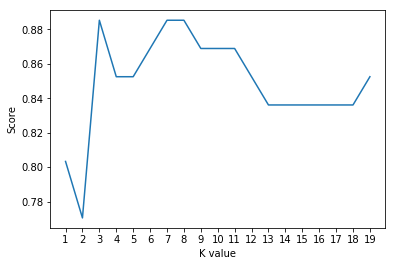

Maximum KNN Score is 88.52%


In [24]:
# try ro find best k value
# 试着找出最好的k值
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 3-7-8 we will reach maximum score. <br>   #正如你在上面看到的，如果我们把k定义为3-7-8，我们就会得到最高分。
## <font color="green">KNN Model's Accuracy is <font color="red">88.52%</font></font>   #KNN模型的精度为88.52%

## Support Vector Machine (SVM) Algorithm    # 支持向量机算法
Now we will use SVM algorithm.   # 现在我们使用SVM算法

**Support Vector Machine Algorithm**  #支持向量机算法
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [25]:
from sklearn.svm import SVC

In [26]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 86.89%


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 86.89%</font></font>
#  支持向量机算法的测试精度 86.89%

## Naive Bayes Algorithm
#  朴素贝叶斯算法

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


## <font color="magenta">Accuracy of Naive Bayes: <font color="red">86.89%</font></font>

## Decision Tree Algorithm
#  决策树算法

**Decision Tree Algorithm**
<br>
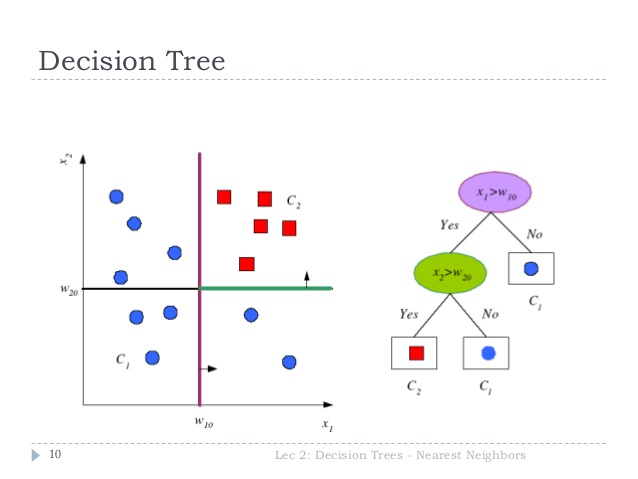

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


## <font color="#CFC60E">Test Accuracy of Decision Tree Algorithm: <font color="red">78.69%</font></font>

## Random Forest Classification
#  随机森林分类

In [29]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


## <font color="#0FBBAE">Test Accuracy of Random Forest: <font color="red">88.52%</font></font>

## Comparing Models
#  对比模型

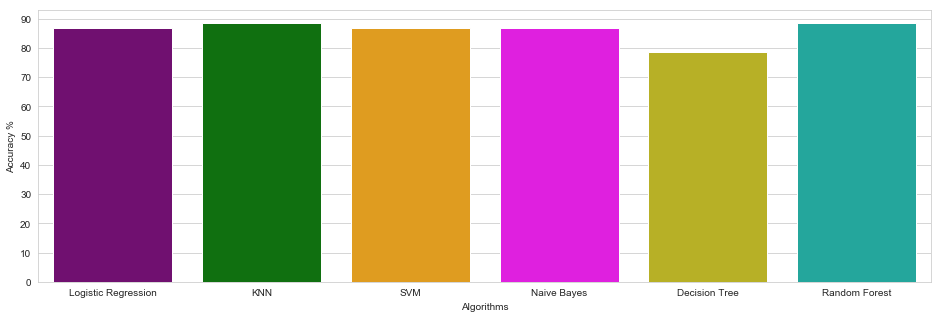

In [30]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))           #y轴以10为单位
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Our models work fine but best of them are KNN and Random Forest with 88.52% of accuracy. Let's look their confusion matrixes.
# 我们的模型运行良好，但其中最好的是KNN和Random Forest，准确率为88.52%。让我们看看他们的困惑矩阵。

**I am new with data science. Please comment me your feedbacks to help me improve myself. Thanks for your time.**